# 10ª Competição de Machine Learning - FLAI

### 1. Importando o Arquivo CSV:

In [1]:
#!pip install xgboost
#!pip install seaborn
#!pip install matplotlib

#!pip install pandas


#!pip install scikit-learn-intelex
#!pip install sklearn --upgrade
#!pip install imblearn
#!pip install sklearn

#from sklearnex import patch_sklearn
#patch_sklearn()

!pip list

#!conda list -n base
#!conda update -n base scikit-learn -y
#conda install -c conda-forge xgboost

#!pip freeze > requirements.txt
#!pip install -r requirements.txt --upgrade

#single_precision_histogram=True

import pandas as pd

!python --version

import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

from platform import python_version
print('Python Version: ',python_version())

import xgboost as xgb

print("Versão do XGBOOST: ",xgb.__version__)

Package                      Version
---------------------------- -----------
absl-py                      1.3.0
ansi2html                    1.8.0
anyio                        3.5.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
attrs                        22.1.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       4.1.0
cachetools                   5.2.0
catboost                     1.1.1
category-encoders            2.5.1.post0
certifi                      2022.9.24
cffi                         1.15.1
charset-normalizer           2.1.1
click                        8.1.3
click-plugins                1.1.1
cligj                        0.7.2
contourpy                    1.0.6
cycler                       0.11.0
Cython                       3.0.0a11
dash                         2.7.1
dash-core-components         2.0.0
dash-html-components        

In [2]:

from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np


In [3]:
df_treino = pd.read_csv('dados/treino.csv')

df_treino

,idade,trabalho,estado civil,educação,atraso,casa,empréstimo,contato,mês,dia,duração,ncontatos,anterior,produto
0,36,escritório,casado(a),ensino médio,não,não,não,telefone fixo,junho,quinta-feira,média,1,nenhum,não
1,32,trabalhador manual,casado(a),básico,NaN,não,não,telefone móvel,julho,terça-feira,média,4,nenhum,não
2,49,especialista,casado(a),NaN,não,sim,não,telefone fixo,maio,segunda-feira,longa,1,nenhum,não
3,28,especialista,solteiro(a),NaN,não,não,não,telefone móvel,outubro,terça-feira,longa,1,nenhum,não
4,31,escritório,solteiro(a),ensino técnico,não,NaN,NaN,telefone móvel,junho,quinta-feira,média,1,apenas um,sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,44,especialista,casado(a),NaN,NaN,não,não,telefone fixo,maio,segunda-feira,longa,2,nenhum,não
5696,36,trabalhador manual,solteiro(a),básico,não,sim,não,telefone móvel,julho,quarta-feira,curta,1,nenhum,não
5697,28,especialista,solteiro(a),graduação,não,sim,não,telefone móvel,dezembro,terça-feira,longa,3,apenas um,sim
5698,51,trabalhador manual,casado(a),básico,NaN,não,não,telefone fixo,maio,sexta-feira,longa,1,nenhum,não


In [4]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   idade         5700 non-null   int64 
 1   trabalho      5477 non-null   object
 2   estado civil  5687 non-null   object
 3   educação      5457 non-null   object
 4   atraso        4677 non-null   object
 5   casa          5562 non-null   object
 6   empréstimo    5562 non-null   object
 7   contato       5700 non-null   object
 8   mês           5700 non-null   object
 9   dia           5700 non-null   object
 10  duração       5700 non-null   object
 11  ncontatos     5700 non-null   int64 
 12  anterior      5700 non-null   object
 13  produto       5700 non-null   object
dtypes: int64(2), object(12)
memory usage: 623.6+ KB


In [5]:
df_treino.isnull().sum()
df_treino.dtypes

idade            int64
trabalho        object
estado civil    object
educação        object
atraso          object
casa            object
empréstimo      object
contato         object
mês             object
dia             object
duração         object
ncontatos        int64
anterior        object
produto         object
dtype: object

In [6]:
df_treino.describe()

,idade,ncontatos
count,5700.000000,5700.000000
mean,40.976842,2.457719
std,11.217724,2.585706
min,19.000000,1.000000
25%,33.000000,1.000000
50%,38.000000,2.000000
75%,48.000000,3.000000
max,99.000000,42.000000


In [7]:
df_treino['atraso'].value_counts()       # 1



df_treino['contato'].value_counts()      # 2

df_treino['duração'].value_counts()      # 3
df_treino['estado civil'].value_counts() # 3
df_treino['anterior'].value_counts()     # 3



df_treino['trabalho'].value_counts()     # 9

df_treino['mês'].value_counts() #10
df_treino['dia'].value_counts() #10
df_treino['idade'].value_counts()

#colunas ruins
df_treino['casa'].value_counts()         # 2
df_treino['empréstimo'].value_counts()   # 2
df_treino['educação'].value_counts()     # 4

df_treino['ncontatos'].value_counts()  

1     2502
2     1506
3      707
4      359
5      210
6      127
7       83
8       46
9       35
10      29
12      16
11      16
13      11
16       8
14       7
15       6
18       6
17       4
20       4
27       3
29       3
21       2
22       2
28       1
32       1
24       1
42       1
35       1
26       1
25       1
23       1
Name: ncontatos, dtype: int64

In [8]:
colunas_categoricas=['dia','trabalho','estado civil','educação','atraso','casa', \
                            'empréstimo','contato','duração','anterior']

colunas_categoricas_backup = colunas_categoricas

In [9]:
enc_dict_mes = {'janeiro':0,
                'fevereiro':1,
                'março':2,
                'abril':3,
                'maio':4,
                'junho':5,
                'julho':6,
                'agosto':7,
                'setembro':8,
                'outubro':9,
                'novembro':10,
                'dezembro':11}



enc_dict_dia_semana = {'segunda-feira':0,
                       'terça-feira':1,
                       'quarta-feira':1,
                       'quinta-feira':1,
                       'sexta-feira':2}

In [10]:
def faz_etl(tabela):
    
    #estrategia_nulos = "mais_frequente"
    estrategia_nulos = "preenche_nan"

    #preenchendo valores nulos
    if estrategia_nulos == "mais_frequente":
        imp = SimpleImputer(strategy="most_frequent")
    else:
        imp = SimpleImputer(strategy='constant', fill_value='nan')
        
    lista_colunas_com_nulos=['trabalho','estado civil','educação','casa','empréstimo']
    for coluna in lista_colunas_com_nulos:
        tabela[coluna] = imp.fit_transform(tabela[coluna].values.reshape(-1, 1))
    
       
    # normalizando variáveis contínuas
    lista_continuas=['idade','ncontatos']
    tabela[lista_continuas] = MinMaxScaler().fit_transform(tabela[lista_continuas])
    tabela[lista_continuas]
    
    #codificando dia e mês como valores numéricos específicos
    tabela['mês'] = tabela['mês'].map(enc_dict_mes)
    tabela['dia'] = tabela['dia'].map(enc_dict_dia_semana)
    
    
     #codificando variáveis categóricas como valores numéricos
    lista_dicotomicas=['atraso','contato','casa','empréstimo','duração','estado civil','anterior','educação','trabalho']
     
    for coluna in lista_dicotomicas:
        tabela[coluna] = LabelEncoder().fit_transform(tabela[coluna])
        
        
    # convertendo variável categórica mês em variável contínua cíclica utilizando seno e cosseno
    tabela['mês_seno'] = np.sin(tabela['mês'] * (2 * np.pi / 12))
    tabela['mês_cosseno'] = np.cos(tabela['mês'] * (2 * np.pi / 12))
    
    # removendo a coluna mês
    tabela = tabela.drop(columns = ['mês'])
        
    return tabela

In [11]:
#separando a coluna resposta
df_treino['produto'] = LabelEncoder().fit_transform(df_treino['produto'])
coluna_resposta = df_treino['produto'].copy()
df_treino = df_treino.drop(columns = ['produto'])
coluna_resposta_backup = coluna_resposta
coluna_resposta

0       0
1       0
2       0
3       0
4       1
       ..
5695    0
5696    0
5697    1
5698    0
5699    1
Name: produto, Length: 5700, dtype: int64

In [12]:
#tratando os dados
df_treino = faz_etl(df_treino.copy())

df_backup_treino = df_treino
df_treino

,idade,trabalho,estado civil,educação,atraso,casa,empréstimo,contato,dia,duração,ncontatos,anterior,mês_seno,mês_cosseno
0,0.2125,4,0,1,0,1,1,0,1,2,0.000000,2,5.000000e-01,-8.660254e-01
1,0.1625,9,0,0,1,1,1,1,1,2,0.073171,2,1.224647e-16,-1.000000e+00
2,0.3750,5,0,4,0,2,1,0,0,1,0.000000,2,8.660254e-01,-5.000000e-01
3,0.1125,5,3,4,0,1,1,1,1,1,0.000000,2,-1.000000e+00,-1.836970e-16
4,0.1500,4,3,2,0,0,0,1,1,2,0.000000,0,5.000000e-01,-8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,0.3125,5,0,4,1,1,1,0,0,1,0.024390,2,8.660254e-01,-5.000000e-01
5696,0.2125,9,3,0,0,2,1,1,1,0,0.000000,2,1.224647e-16,-1.000000e+00
5697,0.1125,5,3,3,0,2,1,1,1,1,0.048780,0,-5.000000e-01,8.660254e-01
5698,0.4000,9,0,0,1,1,1,0,2,1,0.000000,2,8.660254e-01,-5.000000e-01


In [13]:
df_teste = pd.read_csv('dados/teste.csv')
df_teste = faz_etl(df_teste.copy())
df_backup_teste = df_teste
df_teste

,idade,trabalho,estado civil,educação,atraso,casa,empréstimo,contato,dia,duração,ncontatos,anterior,mês_seno,mês_cosseno
0,0.211268,9,0,1,1,2,1,0,2,0,0.000000,2,8.660254e-01,-5.000000e-01
1,0.323944,4,0,3,1,2,1,0,0,2,0.000000,2,8.660254e-01,-5.000000e-01
2,0.338028,8,3,1,1,2,1,1,1,1,0.000000,2,-8.660254e-01,5.000000e-01
3,0.225352,3,0,0,1,2,2,0,0,2,0.000000,2,-8.660254e-01,5.000000e-01
4,0.225352,9,0,0,0,2,1,1,1,0,0.382353,2,1.224647e-16,-1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,0.676056,0,0,3,0,1,1,1,1,2,0.029412,2,1.000000e+00,6.123234e-17
3296,0.478873,9,0,0,0,2,1,0,1,0,0.029412,2,8.660254e-01,-5.000000e-01
3297,0.253521,5,0,1,1,2,1,1,1,1,0.000000,2,1.224647e-16,-1.000000e+00
3298,0.478873,9,0,0,0,1,2,1,0,1,0.000000,0,5.000000e-01,-8.660254e-01


# Treinando Modelos

In [14]:
# PARÂMETROS INICIAS PARA O TUNING DO XGBOOST
    
params = {  
            #'classification__colsample_bytree': [0.01,0.5,1],

            #'classification__learning_rate': [0.01,0.5,1],

            #'classification__max_depth': [3,6,10],
            #'classification__n_estimators': [5,100,250],

            #'classification__seed': [5,70,140],#subsample e seed andam juntos
            #'classification__subsample': [0.01,0.5,1],

           'over_sampling__k_neighbors':[1, 2, 3, 4, 5, 6, 7],
           'over_sampling__sampling_strategy':[0.5,0.7,1],
           'under_sampling__sampling_strategy':[0.5,0.8,1]
          }


In [367]:
#XGBOOST com GRIDSEARCHCV, RFECV SNOTENC e RandomUnderSampling

from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier



def executa_xgbclassifier(k):
    
        lista_indices_colunas_categoricas = df_treino.columns.get_indexer(colunas_categoricas)
        
        pipe_model = Pipeline([
                ('over_sampling', SMOTENC(lista_indices_colunas_categoricas, random_state=42)),
                ('under_sampling', RandomUnderSampler(random_state=42)),
                ('classification', XGBClassifier(objective= 'binary:logistic')) #min_child_weight 
                #('extra', ExtraTreesClassifier())
            ])
         
        params = {  
                    'classification__colsample_bytree': [1],

                    'classification__learning_rate': [0.02],

                    'classification__max_depth': [8],
                    'classification__n_estimators': [300],

                    'classification__seed': [40],#subsample e seed andam juntos
                    'classification__subsample': [0.71],

                    'over_sampling__k_neighbors':[4],
                    'over_sampling__sampling_strategy':[0.8],
                    'under_sampling__sampling_strategy':[0.8]
                  }


        robo_treinado_por_GSCV_xgb = GridSearchCV(
                                                   estimator=pipe_model, 
                                                   param_grid=params,
                                                   cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=1),
                                                   n_jobs = -1,
                                                   scoring= 'f1',#'roc_auc',#'f1',
                                                   verbose = 1
                                                  )
        
               
        robo_treinado_por_GSCV_xgb.fit(df_treino, coluna_resposta)

        return robo_treinado_por_GSCV_xgb

import time
inicio = time.time()

robo_treinado_por_GSCV_xgb = executa_xgbclassifier(12) 

print("\nTempo de execução:", time.time() - inicio)
print("\nMelhores Parâmetros:", robo_treinado_por_GSCV_xgb.best_params_)
print("\nValor F1: ", robo_treinado_por_GSCV_xgb.best_score_)

Fitting 12 folds for each of 1 candidates, totalling 12 fits

Tempo de execução: 5.371350288391113

Melhores Parâmetros: {'classification__colsample_bytree': 1, 'classification__learning_rate': 0.02, 'classification__max_depth': 8, 'classification__n_estimators': 300, 'classification__seed': 40, 'classification__subsample': 0.71, 'over_sampling__k_neighbors': 4, 'over_sampling__sampling_strategy': 0.8, 'under_sampling__sampling_strategy': 0.8}

Valor F1:  0.740155890275285


In [321]:
#Verifica f1 score do modelo na propria base treinada

from sklearn.metrics import f1_score

#coluna_previsao = robo_treinado_por_RFECV.predict(df_treino)
coluna_previsao = robo_treinado_por_GSCV_xgb.best_estimator_.predict(df_treino)
#coluna_previsao = escolhedor_de_colunas.named_steps['rfe'].predict(df_treino)

F1_Score = f1_score(coluna_resposta, coluna_previsao)

print("\nF1_SCORE: ", F1_Score)



F1_SCORE:  0.9026223484215801


In [322]:
#Verifica f1 score do modelo na propria base treinada

from sklearn.metrics import f1_score

#coluna_previsao = robo_treinado_por_RFECV.predict(df_treino)
coluna_previsao = robo_treinado_por_GSCV_xgb.best_estimator_.predict(dados_teste)
#coluna_previsao = escolhedor_de_colunas.named_steps['rfe'].predict(df_treino)

F1_Score = f1_score(coluna_resposta_teste, coluna_previsao)

print("\nF1_SCORE: ", F1_Score)


F1_SCORE:  0.7306616961789376


In [249]:
dados_teste

,idade,atraso,contato,ncontatos,dia_seno,dia_cosseno,mês_seno,mês_cosseno,casa_nan,casa_não,...,trabalho_aposentado,trabalho_desempregado,trabalho_do lar,trabalho_empreendedor,trabalho_escritório,trabalho_especialista,trabalho_gerência,trabalho_nan,trabalho_terceirizados,trabalho_trabalhador manual
5308,0.0875,0,1,0.024390,0.781831,0.623490,1.224647e-16,-1.000000,0,1,...,0,0,0,0,0,0,0,0,0,1
2896,0.3375,0,0,0.000000,0.974928,-0.222521,5.000000e-01,-0.866025,0,1,...,0,0,0,0,0,0,1,0,0,0
2900,0.1250,0,1,0.073171,-0.433884,-0.900969,5.000000e-01,-0.866025,0,0,...,0,0,0,0,0,0,0,0,1,0
1457,0.1000,0,1,0.024390,0.433884,-0.900969,8.660254e-01,-0.500000,0,1,...,0,0,0,0,1,0,0,0,0,0
21,0.3250,0,1,0.000000,0.000000,1.000000,0.000000e+00,1.000000,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3960,0.2250,0,1,0.146341,0.974928,-0.222521,5.000000e-01,-0.866025,0,0,...,0,0,0,0,0,1,0,0,0,0
4445,0.4000,1,0,0.024390,0.974928,-0.222521,5.000000e-01,-0.866025,0,1,...,0,0,0,0,0,0,0,0,0,1
1877,0.3375,0,1,0.121951,0.000000,1.000000,5.000000e-01,0.866025,0,1,...,0,0,0,0,0,0,0,0,0,1
3901,0.3750,0,1,0.000000,0.974928,-0.222521,5.000000e-01,0.866025,0,0,...,0,0,0,1,0,0,0,0,0,0


In [365]:
#Redimensiona dataframe conforme a lista fornecida de colunas


#Melhores Colunas: 
#['contato', 'duração', 'anterior', 'mês_seno', 'mês_cosseno']

#Número de colunas : 5

lista =['contato', 'duração', 'anterior', 'mês_seno', 'mês_cosseno'] #5colunas

#9 colunas
#lista = ['contato', 'duração', 'anterior', 'mês_seno', 'mês_cosseno', 'atraso', 'idade', 
#            'trabalho', 'dia_seno'] 

#10 colunas
#lista = ['contato', 'duração', 'anterior', 'mês_seno', 'mês_cosseno', 
# 'atraso', 'idade', 'trabalho', 'dia_seno', 'ncontatos'] 

#10 colunasB
#lista =['idade', 'trabalho', 'estado civil', 'atraso', 'contato', 
 #       'duração', 'ncontatos', 'anterior', 'mês_seno', 'mês_cosseno']

#13 colunas
#lista =['idade', 'trabalho', 'educação', 'atraso', 'empréstimo', 'contato', 'duração', 
#'ncontatos', 'anterior', 'dia_seno', 'dia_cosseno', 'mês_seno', 'mês_cosseno']

#12 colunas
#lista =['idade', 'trabalho', 'estado civil', 'atraso', 'empréstimo', 'contato', 
        
#        'dia', 'duração', 'ncontatos', 'anterior', 'mês_seno', 'mês_cosseno']

#11  melhores colunas:  
#lista =['idade', 'trabalho', 'estado civil', 'atraso', 'contato', 'dia',
# 'duração', 'ncontatos', 'anterior', 'mês_seno', 'mês_cosseno']

#8 colunas
#lista =['contato','mês_seno','mês_cosseno','duração_curta','duração_longa','duração_média','anterior_mais de um','anterior_nenhum']

#7colunas
#lista =['contato','mês_cosseno','duração_curta','duração_longa','duração_média','anterior_mais de um','anterior_nenhum']

df_treino = df_backup_treino
df_teste = df_backup_teste
colunas_categoricas = colunas_categoricas_backup
coluna_resposta = coluna_resposta_backup

df_treino = df_treino[lista]
df_teste = df_teste[lista]
colunas_categoricas = [elemento for elemento in colunas_categoricas if elemento in df_treino.columns]
df_treino

,contato,duração,anterior,mês_seno,mês_cosseno
0,0,2,2,5.000000e-01,-8.660254e-01
1,1,2,2,1.224647e-16,-1.000000e+00
2,0,1,2,8.660254e-01,-5.000000e-01
3,1,1,2,-1.000000e+00,-1.836970e-16
4,1,2,0,5.000000e-01,-8.660254e-01
...,...,...,...,...,...
5695,0,1,2,8.660254e-01,-5.000000e-01
5696,1,0,2,1.224647e-16,-1.000000e+00
5697,1,1,0,-5.000000e-01,8.660254e-01
5698,0,1,2,8.660254e-01,-5.000000e-01


In [339]:
#aplica smote no dataframe para balancear os dados
df_treino_copia = df_treino.copy()
coluna_resposta_copia = coluna_resposta.copy()

from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=620)
df_treino, coluna_resposta = sm.fit_resample(df_treino_copia, coluna_resposta_copia)
df_treino

,idade,atraso,contato,ncontatos,dia_seno,dia_cosseno,mês_seno,mês_cosseno,casa_nan,casa_não,...,trabalho_aposentado,trabalho_desempregado,trabalho_do lar,trabalho_empreendedor,trabalho_escritório,trabalho_especialista,trabalho_gerência,trabalho_nan,trabalho_terceirizados,trabalho_trabalhador manual
0,0.212500,0,0,0.000000,0.781831,0.623490,8.660254e-01,-5.000000e-01,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.162500,1,1,0.073171,-0.433884,-0.900969,1.000000e+00,6.123234e-17,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.375000,0,0,0.000000,0.974928,-0.222521,5.000000e-01,-8.660254e-01,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.112500,0,1,0.000000,-0.433884,-0.900969,-8.660254e-01,-5.000000e-01,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.150000,0,1,0.000000,0.781831,0.623490,8.660254e-01,-5.000000e-01,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,0.193741,0,0,0.036591,0.433884,-0.900969,5.000000e-01,-8.660254e-01,0,1,...,0,0,0,0,0,0,0,0,0,0
7604,0.172813,0,1,0.002012,0.000000,1.000000,5.000000e-01,-8.660254e-01,0,0,...,0,0,0,0,0,0,0,0,0,0
7605,0.875000,0,1,0.082951,0.000000,1.000000,1.224647e-16,-1.000000e+00,0,0,...,1,0,0,0,0,0,0,0,0,0
7606,0.222843,0,1,0.047310,0.433884,-0.900969,5.000000e-01,-8.660254e-01,0,0,...,0,0,0,0,0,0,0,0,0,0


In [318]:
#separa parte dos dados para treino e teste
from sklearn.model_selection import train_test_split 

df_treino = df_backup_treino
df_teste = df_backup_teste
colunas_categoricas = colunas_categoricas_backup
coluna_resposta = coluna_resposta_backup

df_treino, dados_teste, coluna_resposta,coluna_resposta_teste  = train_test_split(df_treino, coluna_resposta, test_size = 0.25,random_state = 1)

df_treino

,idade,atraso,contato,ncontatos,dia_seno,dia_cosseno,mês_seno,mês_cosseno,casa_nan,casa_não,...,trabalho_aposentado,trabalho_desempregado,trabalho_do lar,trabalho_empreendedor,trabalho_escritório,trabalho_especialista,trabalho_gerência,trabalho_nan,trabalho_terceirizados,trabalho_trabalhador manual
306,0.2875,0,1,0.219512,0.781831,0.623490,1.000000,6.123234e-17,0,1,...,0,0,0,1,0,0,0,0,0,0
1249,0.2750,0,1,0.097561,0.000000,1.000000,0.500000,-8.660254e-01,0,0,...,0,0,0,0,0,1,0,0,0,0
3624,0.1750,0,0,0.024390,0.974928,-0.222521,0.866025,-5.000000e-01,0,1,...,0,0,0,0,1,0,0,0,0,0
2928,0.2625,1,1,0.219512,0.781831,0.623490,0.500000,8.660254e-01,0,1,...,0,0,0,0,1,0,0,0,0,0
2116,0.1000,0,1,0.000000,0.000000,1.000000,0.500000,8.660254e-01,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.5250,1,1,0.024390,0.433884,-0.900969,0.000000,1.000000e+00,0,0,...,1,0,0,0,0,0,0,0,0,0
5192,0.1625,0,1,0.048780,0.781831,0.623490,0.500000,8.660254e-01,0,1,...,0,0,0,0,1,0,0,0,0,0
3980,0.0875,0,1,0.024390,-0.433884,-0.900969,1.000000,6.123234e-17,0,0,...,0,0,0,0,0,0,0,0,0,1
235,0.1500,0,1,0.000000,0.974928,-0.222521,0.500000,8.660254e-01,0,1,...,0,0,0,0,1,0,0,0,0,0


In [720]:
#Escolhe as melhores colunas:

from sklearn.feature_selection import RFECV

robo_treinado_por_RFECV = RFECV(estimator=XGBClassifier(objective= 'binary:logistic'), 
                                           step=1, 
                                           cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=1), 
                                           scoring = 'f1')

import time
inicio = time.time()

robo_treinado_por_RFECV.fit(df_treino, coluna_resposta)
#print(robo_treinado_por_RFECV.score(df_treino,coluna_resposta))

print("\nFinalizado em:", time.time() - inicio, " segundos.")




Finalizado em: 28.482900857925415  segundos.


In [721]:
print(robo_treinado_por_RFECV.score(df_treino,coluna_resposta))

0.8128070175438596


In [722]:
melhores_colunas = list(robo_treinado_por_RFECV.get_feature_names_out())

print("\nMelhores Colunas: ")
print(melhores_colunas)
print("\nNúmero de colunas : %d" % robo_treinado_por_RFECV.n_features_)

print("\nMaior F1_SCORE médio: ", robo_treinado_por_RFECV.cv_results_['mean_test_score'].max())


Melhores Colunas: 
['contato', 'duração', 'anterior', 'mês_seno', 'mês_cosseno']

Número de colunas : 5

Maior F1_SCORE médio:  0.7243044107331171


In [1223]:
df_treino = df_backup_treino
df_teste = df_backup_teste
colunas_categoricas = colunas_categoricas_backup

In [1225]:
#Redimensiona o dataframe conforme o numero de melhores colunas do RFECV escolhido
import numpy as np
robo_treinado_por_RFECV = escolhedor_de_colunas.named_steps['rfe']

numero_de_colunas = 11

array_ranking_colunas = robo_treinado_por_RFECV.ranking_
array_indices_ranking_colunas_ordenados = np.argsort(array_ranking_colunas)
array_indices_melhores_colunas = array_indices_ranking_colunas_ordenados[0:numero_de_colunas]

df_treino = df_treino[df_treino.columns[array_indices_melhores_colunas]]
df_teste = df_teste[df_teste.columns[array_indices_melhores_colunas]]
colunas_categoricas = [elemento for elemento in colunas_categoricas if elemento in df_treino.columns]

print("\n", numero_de_colunas, " melhores colunas: ", list(df_treino.columns))
print("\ncolunas_categoricas: ", colunas_categoricas)

df_treino



 11  melhores colunas:  ['idade', 'trabalho', 'estado civil', 'atraso', 'contato', 'dia', 'duração', 'ncontatos', 'anterior', 'mês_seno', 'mês_cosseno']

colunas_categoricas:  ['dia', 'trabalho', 'estado civil', 'atraso', 'contato', 'duração', 'anterior']


,idade,trabalho,estado civil,atraso,contato,dia,duração,ncontatos,anterior,mês_seno,mês_cosseno
0,0.2125,4,0,0,0,1,2,0.000000,2,5.000000e-01,-8.660254e-01
1,0.1625,9,0,1,1,1,2,0.073171,2,1.224647e-16,-1.000000e+00
2,0.3750,5,0,0,0,0,1,0.000000,2,8.660254e-01,-5.000000e-01
3,0.1125,5,3,0,1,1,1,0.000000,2,-1.000000e+00,-1.836970e-16
4,0.1500,4,3,0,1,1,2,0.000000,0,5.000000e-01,-8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...
5695,0.3125,5,0,1,0,0,1,0.024390,2,8.660254e-01,-5.000000e-01
5696,0.2125,9,3,0,1,1,0,0.000000,2,1.224647e-16,-1.000000e+00
5697,0.1125,5,3,0,1,1,1,0.048780,0,-5.000000e-01,8.660254e-01
5698,0.4000,9,0,1,0,2,1,0.000000,2,8.660254e-01,-5.000000e-01


In [593]:
from sklearn.metrics import f1_score
coluna_previsao = robo_treinado_por_RFECV.predict(df_treino)
F1_Score = f1_score(coluna_resposta, coluna_previsao)

print("\nF1_SCORE: ", F1_Score)


F1_SCORE:  0.7323730098559514


/home/mhmatsumura/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


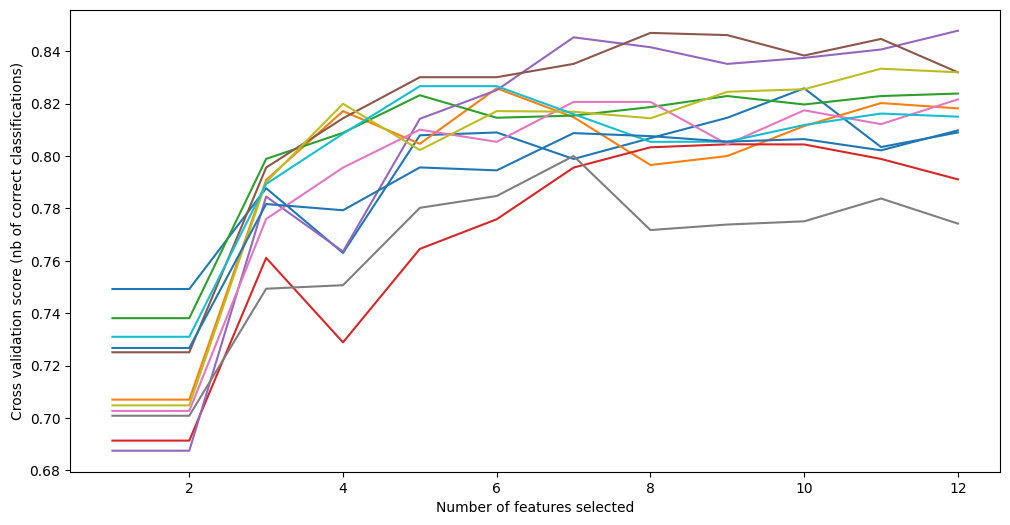

In [1230]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(robo_treinado_por_RFECV.grid_scores_) + 1), robo_treinado_por_RFECV.grid_scores_)
plt.show()

In [1231]:
#análise das melhores colunas:

robo_treinado_por_RFECV = escolhedor_de_colunas.named_steps['rfe']
matriz_resultados = robo_treinado_por_RFECV.cv_results_
#print(matriz_resultados['mean_test_score'].dtype)



#matriz_resultados = np.char.replace(matriz_resultados, '.', ',')
#matriz_resultados = matriz_resultados.astype(str)

df_resultados=pd.DataFrame(matriz_resultados['mean_test_score'], columns=['pontuação_média'])
df_resultados.columns.name = 'número_colunas'

df_resultados['desvio_padrão'] = matriz_resultados['std_test_score']
df_resultados['média_x_desvio'] = matriz_resultados['mean_test_score'] / matriz_resultados['std_test_score']
df_resultados.index += 1 #INDICE COMEÇA COM 1

df_resultados.média_x_desvio = df_resultados.média_x_desvio.astype(float) 

#print(df_resultados['média_x_desvio'].dtype)

df_classificado_pontuação_média = df_resultados.sort_values(by=['pontuação_média'], ascending=False)
df_classificado_média_x_desvio = df_resultados.sort_values('média_x_desvio', ascending=False)

print("\n\nCLASSIFICADO POR PONTUAÇÃO_MÉDIA: ")
dfstyle2 = df_classificado_pontuação_média.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
display(dfstyle2)

print("\nCLASSIFICADO POR MÉDIA X DESVIO: ")
dfstyle1 = df_classificado_média_x_desvio.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
display(dfstyle1)

print("\nMelhor número de colunas: %d" % robo_treinado_por_RFECV.n_features_)

melhores_colunas1 = list(robo_treinado_por_RFECV.get_feature_names_out())
melhores_colunas2 = list(robo_treinado_por_RFECV.support_)
melhores_colunas3 = list(robo_treinado_por_RFECV.ranking_ )

print("\nMelhores Colunas1: ")
print(melhores_colunas1)
print("\nMelhores Colunas2: ")
print(melhores_colunas2)
print("\nMelhores Colunas3: ")
print(melhores_colunas3)



CLASSIFICADO POR PONTUAÇÃO_MÉDIA: 


número_colunas,pontuação_média,desvio_padrão,média_x_desvio
11,0.816220,0.017816,45.813601
12,0.815859,0.019252,42.377675
10,0.815768,0.016792,48.580806
7,0.815223,0.014342,56.840252
9,0.812461,0.018540,43.821325
8,0.812154,0.019647,41.337483
6,0.809909,0.017317,46.770449
5,0.805405,0.018813,42.811788
4,0.786348,0.029602,26.563838
3,0.782274,0.014284,54.765021



CLASSIFICADO POR MÉDIA X DESVIO: 


número_colunas,pontuação_média,desvio_padrão,média_x_desvio
7,0.815223,0.014342,56.840252
3,0.782274,0.014284,54.765021
10,0.815768,0.016792,48.580806
6,0.809909,0.017317,46.770449
11,0.816220,0.017816,45.813601
9,0.812461,0.018540,43.821325
5,0.805405,0.018813,42.811788
12,0.815859,0.019252,42.377675
8,0.812154,0.019647,41.337483
1,0.714942,0.019149,37.335061



Melhor número de colunas: 11

Melhores Colunas1: 
['idade', 'trabalho', 'estado civil', 'atraso', 'contato', 'dia', 'duração', 'ncontatos', 'anterior', 'mês_seno', 'mês_cosseno']

Melhores Colunas2: 
[True, True, True, True, False, True, True, True, True, True, True, True]

Melhores Colunas3: 
[1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]


In [89]:
print("\n",matriz_resultados)
print("\n",matriz_resultados['std_test_score'])
print("\n",matriz_resultados['mean_test_score'])


#df_treino = df_treino[melhores_colunas]
#df_teste =  df_teste[melhores_colunas]




 {'mean_test_score': array([0.7163942 , 0.72895618, 0.77613448, 0.78279676, 0.80796686,
       0.81249562, 0.81408482, 0.81228948, 0.81028567, 0.81296797,
       0.81641643, 0.81414897, 0.81016102, 0.81370461, 0.80986273]), 'std_test_score': array([0.01757144, 0.0327563 , 0.01958132, 0.01995885, 0.01192764,
       0.01652201, 0.02187428, 0.02224843, 0.0199799 , 0.01529598,
       0.02532198, 0.02164122, 0.02205475, 0.02366012, 0.02592399]), 'split0_test_score': array([0.72727273, 0.77237852, 0.76923077, 0.76884422, 0.81424936,
       0.80818414, 0.80916031, 0.80310881, 0.79795396, 0.79691517,
       0.77720207, 0.79069767, 0.78756477, 0.79898219, 0.8       ]), 'split1_test_score': array([0.72622478, 0.72622478, 0.80417755, 0.78933333, 0.82442748,
       0.83037975, 0.82619647, 0.81865285, 0.81909548, 0.82442748,
       0.85641026, 0.82506527, 0.8277635 , 0.82741117, 0.82262211]), 'split2_test_score': array([0.71466667, 0.79518072, 0.78832117, 0.7755102 , 0.79596977,
       0.80195599,

In [1276]:
# buscando melhores numero de folds para o CV
maior_F1 = 0
F1_atual = 0
melhor_k = 0

for k in range(2,21):
    
  F1_atual = executa_xgbclassifier(k).best_score_
  #F1_atual = executa_svmclassifier(k).best_score_ 
    
  if F1_atual > maior_F1:
      maior_F1 = F1_atual
      melhor_k = k
  print("k: ", k, " F1_atual: ", F1_atual, " maior_F1: ", maior_F1, " melhor_k: ", melhor_k)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
k:  2  F1_atual:  0.7294099731656323  maior_F1:  0.7294099731656323  melhor_k:  2
Fitting 3 folds for each of 1 candidates, totalling 3 fits
k:  3  F1_atual:  0.7305548184844072  maior_F1:  0.7305548184844072  melhor_k:  3
Fitting 4 folds for each of 1 candidates, totalling 4 fits
k:  4  F1_atual:  0.7365810901708469  maior_F1:  0.7365810901708469  melhor_k:  4
Fitting 5 folds for each of 1 candidates, totalling 5 fits
k:  5  F1_atual:  0.7383163735801742  maior_F1:  0.7383163735801742  melhor_k:  5
Fitting 6 folds for each of 1 candidates, totalling 6 fits
k:  6  F1_atual:  0.7327740343486077  maior_F1:  0.7383163735801742  melhor_k:  5
Fitting 7 folds for each of 1 candidates, totalling 7 fits
k:  7  F1_atual:  0.7359039952715033  maior_F1:  0.7383163735801742  melhor_k:  5
Fitting 8 folds for each of 1 candidates, totalling 8 fits
k:  8  F1_atual:  0.7354321889890578  maior_F1:  0.7383163735801742  melhor_k:  5
Fitting 9 fol

In [90]:
coluna_resposta_previsao = robo_treinado_por_GSCV_xgb.predict(df_teste)

subm = pd.DataFrame()
subm['produto'] = coluna_resposta_previsao

subm['produto'] = subm['produto'].replace([0, 1],['não', 'sim'])

subm

,produto
0,não
1,não
2,sim
3,não
4,não
...,...
3295,sim
3296,não
3297,sim
3298,sim


In [91]:
subm.to_csv('submissão.csv', index = False)

In [1220]:
#implementação do rfecv usando smote
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV
import xgboost as xgb
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler

class Mypipeline(Pipeline):
    @property
    def coef_(self):
        return self._final_estimator.coef_
    @property
    def feature_importances_(self):
        return self._final_estimator.feature_importances_


print(xgb.__version__)


def escolhe_melhores_colunas(estimator,tabela,col_resposta):
    


    #colunas_categoricas=['trabalho','estado civil','educação','atraso','casa', \
     #                    'empréstimo','contato','duração','anterior']
    #colunas_categoricas=['trabalho','educação','atraso', \
     #                    'contato','duração','anterior']
  
    lista_indices_colunas_categoricas = df_treino.columns.get_indexer(colunas_categoricas)
           
    pipe_model = Pipeline([
                            ('over_sampling', estimator.named_steps['over_sampling']),
        
                            ('under_sampling',estimator.named_steps['under_sampling']),
        
                            ('rfe',RFECV(estimator=estimator.named_steps['classification'], 
                                                   step=1, 
                                                   cv=StratifiedKFold(n_splits=11, shuffle=True, random_state=1), 
                                                   scoring = 'f1'))
                          ])

    return pipe_model

import time
inicio = time.time()
                                               
escolhedor_de_colunas = escolhe_melhores_colunas(robo_treinado_por_GSCV_xgb.best_estimator_, \
                                                 df_treino,coluna_resposta)

escolhedor_de_colunas.fit(df_treino, coluna_resposta)

print("\nTempo de execução:", time.time() - inicio)

melhores_colunas = list(escolhedor_de_colunas.get_feature_names_out())

print("\nMelhores Colunas: ")
print(melhores_colunas)

#rfecv.transform(X)


#df_treino = df_treino[melhores_colunas]
#df_teste =  df_teste[melhores_colunas]


1.7.2

Tempo de execução: 38.2399742603302

Melhores Colunas: 
['idade', 'trabalho', 'estado civil', 'atraso', 'contato', 'dia', 'duração', 'ncontatos', 'anterior', 'mês_seno', 'mês_cosseno']
